En este ejercicio, intentaremos predecir usando un modelo lineal, el valor de la cotizacion del IBEX a partir de otras variables de la capital catalana

In [76]:
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install sklearn
# !pip3 install yellowbrick
# !pip3 install apafib
# !pip3 install plotly

Cargamos los modulos necesarios

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Leemos los datos de APAfib

In [78]:
from apafib import load_BCN_IBEX
data = load_BCN_IBEX()
data.head()

,Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges,Dades meteorològiques: Precipitació / Barcelona - Zona Universitària,Dades meteorològiques: Temperatura / Barcelona - Zona Universitària,Dades meteorològiques: Vent / Barcelona - Zona Universitària,Estat del trànsit segons trams horaris / Matí (6-13),Estat del trànsit segons trams horaris / Nit (0-5),Estat del trànsit segons trams horaris / Tarda (14-19),Estat del trànsit segons trams horaris / Vespre (20-24),IPC interanual / Barcelona,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa,Preu electricitat (majorista) /,Matriculacions de vehicles a Barcelona / Turismes,Mercat bursàtil: IBEX-35 /
0,115.0,0.0,8.01,5.61,1.3315,1.1320,1.3569,1.2932,0.5,3.0,82.0,64.0,42.510000,0.0,8079.0
1,115.0,0.0,5.96,6.51,1.5194,1.3092,1.5811,1.3750,0.5,3.0,106.0,87.0,48.720417,0.0,8079.0
2,115.0,0.0,5.31,5.52,1.3979,1.1893,1.4745,1.3311,0.5,2.0,138.0,134.0,46.927500,0.0,8079.0
3,115.0,0.0,5.72,5.13,1.8664,1.2005,1.9598,1.5096,0.5,3.0,149.0,114.0,59.849583,21.0,8079.0
4,115.0,0.0,5.23,4.25,1.8802,1.2213,1.9231,1.4455,0.5,1.0,103.0,81.0,67.545417,54.0,8062.9


In [79]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges,365.0,258.920548,99.042957,27.000000,210.000000,266.000000,310.000000,491.0000
Dades meteorològiques: Precipitació / Barcelona - Zona Universitària,365.0,0.928493,4.056891,0.000000,0.000000,0.000000,0.000000,50.8000
Dades meteorològiques: Temperatura / Barcelona - Zona Universitària,365.0,17.186411,6.033962,4.640000,12.360000,16.360000,23.460000,28.6600
Dades meteorològiques: Vent / Barcelona - Zona Universitària,365.0,4.623973,1.754966,1.630000,3.450000,4.330000,5.390000,12.7300
Estat del trànsit segons trams horaris / Matí (6-13),365.0,1.864942,0.225878,1.317400,1.656700,1.955500,2.036100,2.2897
Estat del trànsit segons trams horaris / Nit (0-5),365.0,1.230517,0.061187,1.132000,1.190900,1.218100,1.251100,1.4916
Estat del trànsit segons trams horaris / Tarda (14-19),365.0,1.943377,0.252567,1.272600,1.736100,1.999600,2.152100,2.3709
Estat del trànsit segons trams horaris / Vespre (20-24),365.0,1.557425,0.160126,1.230400,1.475400,1.536000,1.612300,2.2380
IPC interanual / Barcelona,365.0,2.735068,1.739372,-0.100000,1.800000,2.500000,4.900000,5.8000
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica,365.0,6.276712,4.245570,1.000000,2.000000,6.000000,10.000000,17.0000


Vemos la distribucion de los datos por cada columna

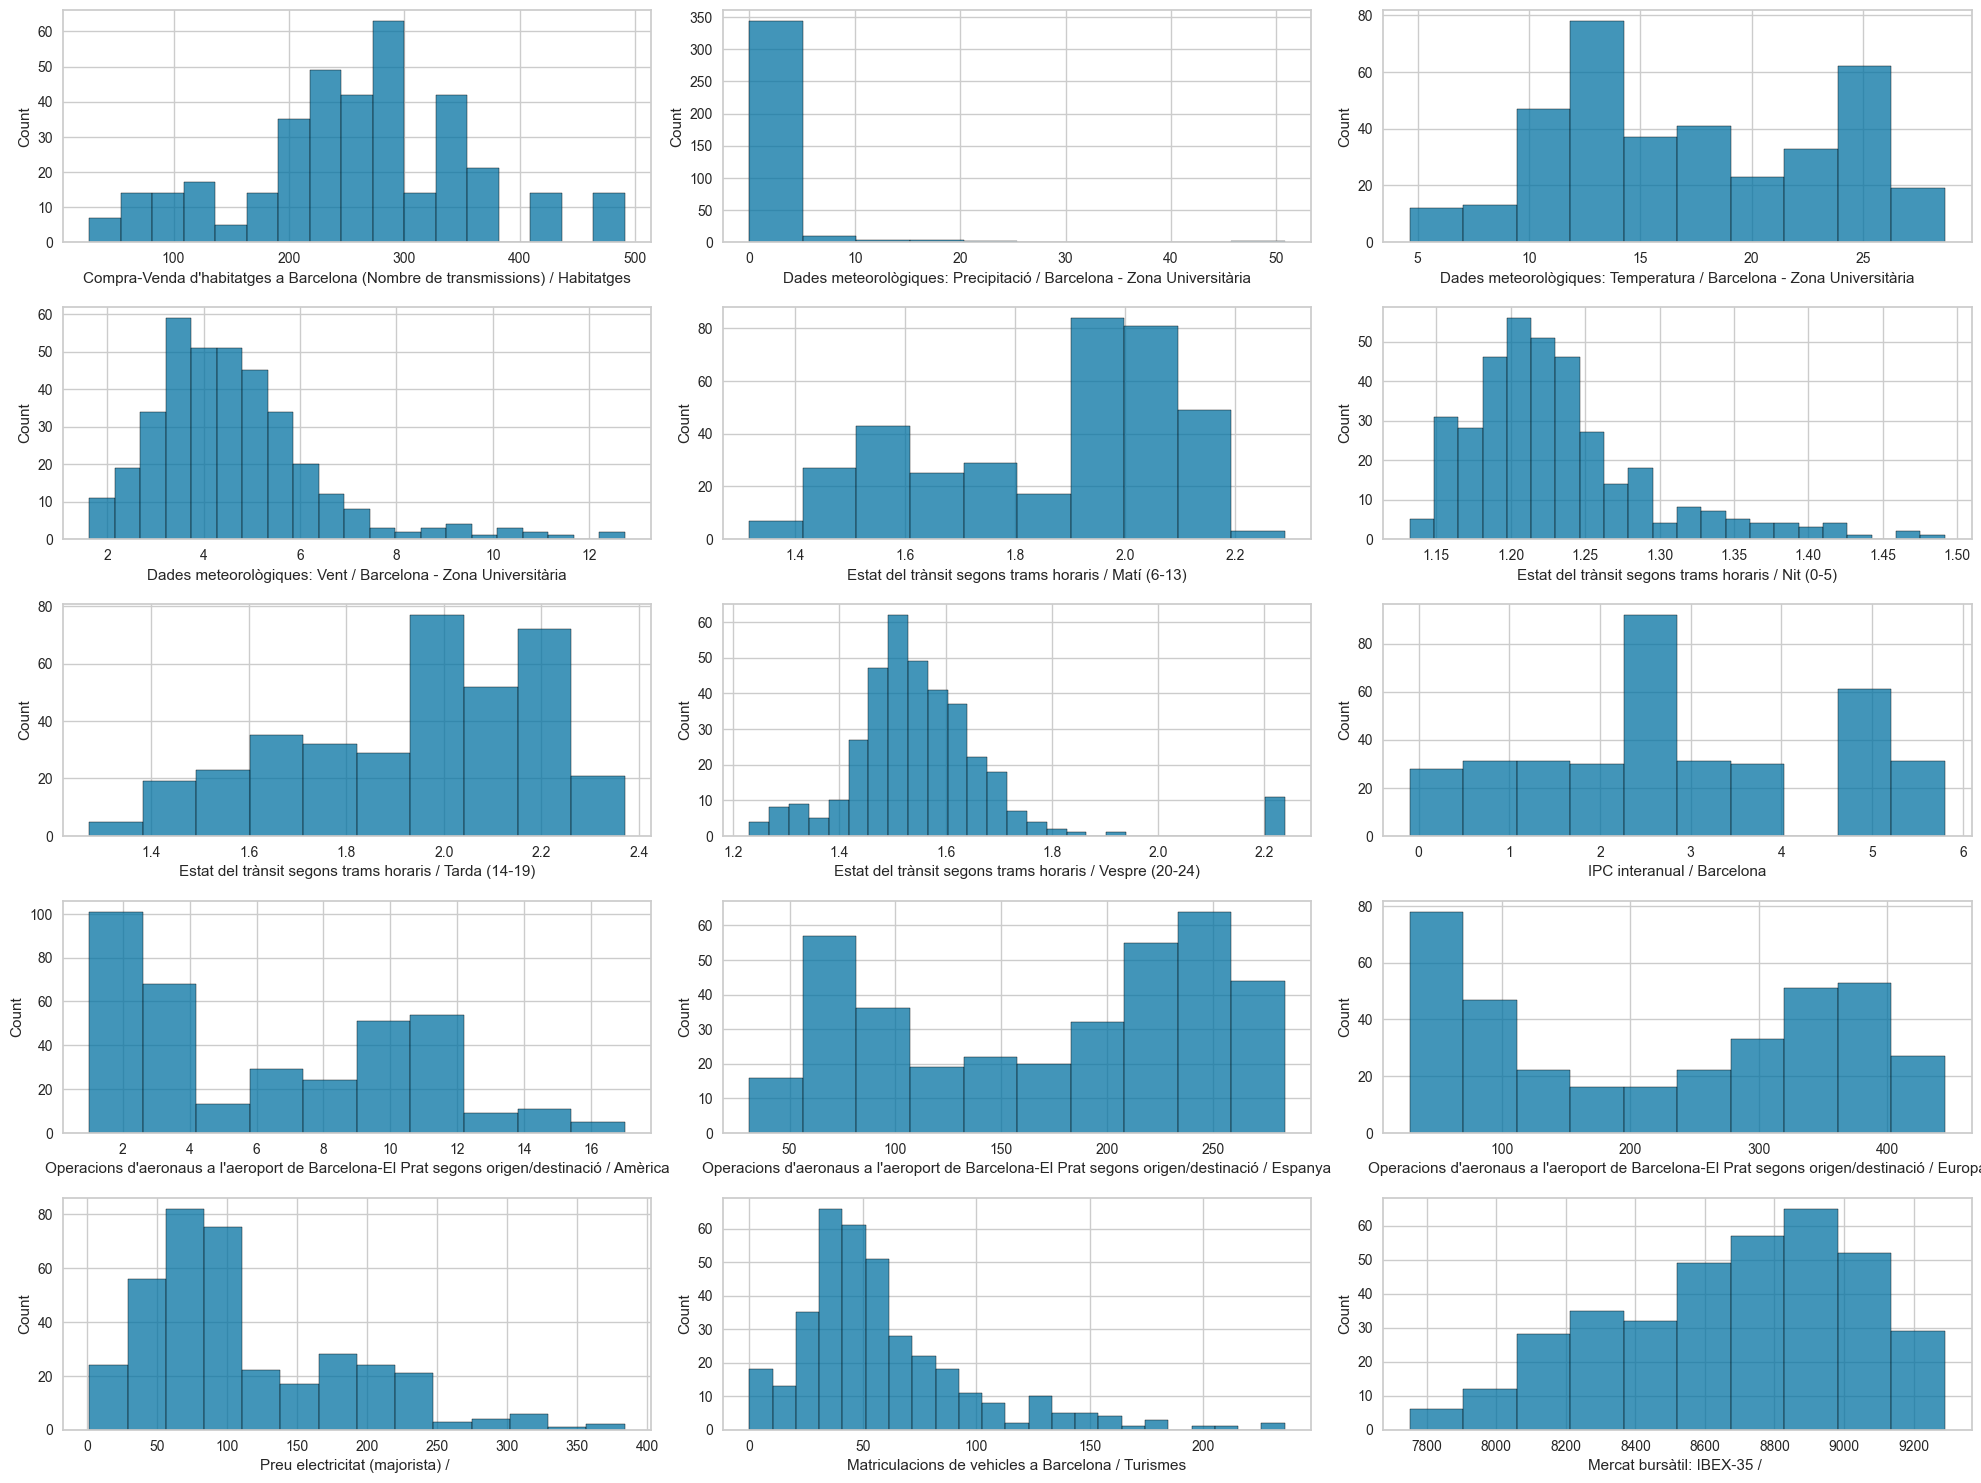

In [111]:
fig, axes = plt.subplots(5,3,figsize=(20,15))

data_frame = pd.DataFrame(data)
data_frame.columns=data.columns
for i, c in enumerate(data.columns):
    ax = axes.reshape(-1)[i]
    if data_frame[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=data_frame,ax=ax)
    else:
        b = sns.histplot(x=c,data=data_frame,ax=ax)
plt.tight_layout()

Podemos ver que solo una de las variables podria seguir una distribucion gausiana, la "Compra-venda d'avitatges" (y aun asi hay que tener un poco de fe para assumir gausianidad en esa variable). Asi que no esperamos grandes resultados de nuestros modelos lineales.

Separamos los datos de la variable objetivo, y creamos los conjuntos de training y test

In [81]:
X= data.iloc[:,:-1]
y= data.loc[:,'Mercat bursàtil: IBEX-35 / '].copy()

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aplicamos el analisis de componentes principales (PCA), para ver si podemos reducir la dimensionalidad del problema sin perder much varianza por el camino:

In [83]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

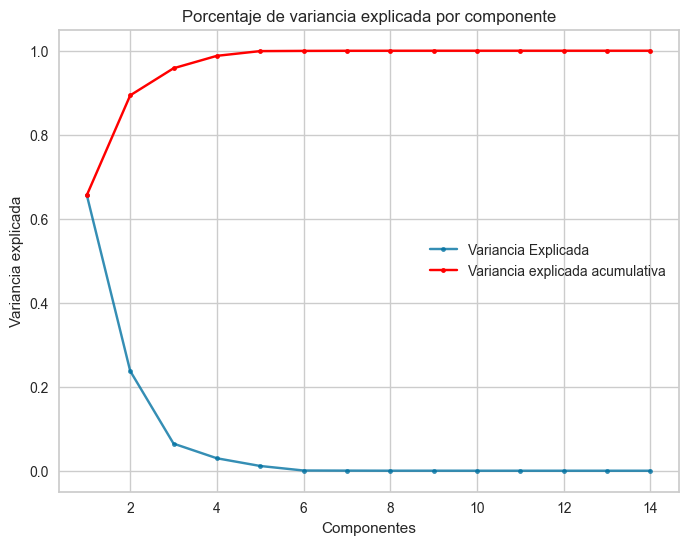

In [84]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

Podemos ver que con 2 componentes podemos explicar un 90% de la varianza, cosa que no está mal, peró es ampliamente mejorable

<AxesSubplot: >

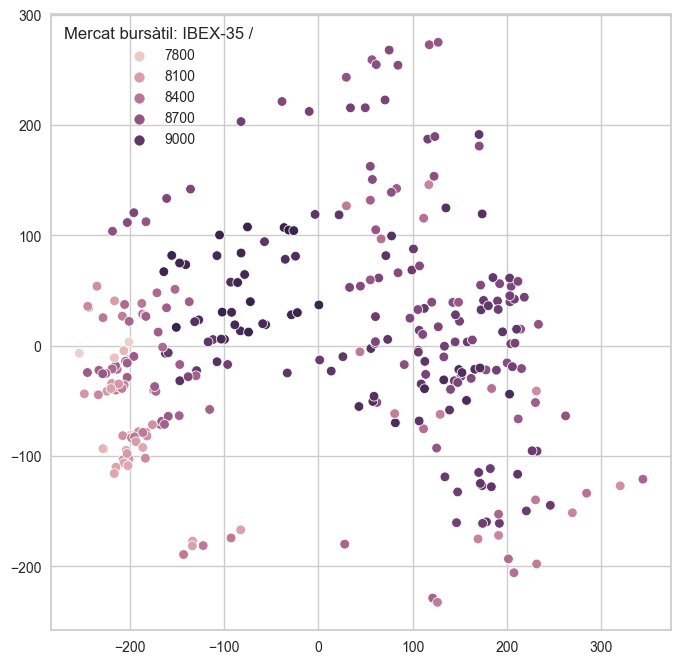

In [85]:
X_trans = pca.transform(X_train)
plt.figure(figsize=(8,8));
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train)

Si lo reporesentamos en 2 dimensiones, podemos observar cumulos de datos que, más o menos, se separan por valores, de todas formas, hay muchas zonas donde no se acaban de separar los puntos, seguramente mas dimensiones ayudarian a aclarar la confusión

Una vez visualizados los datos, vamos a entrenar tres modelos lineales y ver que tan bien pueden ajustarse al modelo y, finalmente, predecir la variable objetivo. Todo sea dicho, dado que antes hemos observado que nuestros datos no siguen una distribucion normal, es de esperar que el desempeño de los modelos sea mas bien mediocre

In [86]:
from sklearn.linear_model import LinearRegression, PoissonRegressor, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Empezaremos entrenado en modelo de Regresion lineal

In [87]:

lr = LinearRegression().fit(X_train,y_train)
r2_lr = np.mean(cross_val_score(lr.fit(X_train,y_train),X_train,y_train))

r2_results = pd.DataFrame({'lr':r2_lr},index=['CV R2'])
r2_results.loc['Test R2', :] =[r2_score(y_test,lr.predict(X_test))]
r2_results.loc['lambda','lr']=0
r2_results

,lr
CV R2,0.668543
Test R2,0.636017
lambda,0.000000


No obtenemos un mal resultado, pero es muy mejorable.

Vamos a ver si los siguentes modelos lo hacen mejor, veamos el resultado de la regresion Ridge

In [88]:
lambdas = [1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

In [89]:
ridge_cv = RidgeCV(alphas=lambdas, cv=5).fit(X_train, y_train)

r2_ridge = np.mean(cross_val_score(ridge_cv, X_train, y_train, cv=5, scoring='r2'))

r2_results = pd.DataFrame({'RidgeRegression':r2_ridge},index=['CV R2'])
r2_results.loc['Test R2', :] =[r2_score(y_test,ridge_cv.predict(X_test))]
r2_results.loc['lambda','RidgeRegression']=10
r2_results

,RidgeRegression
CV R2,0.667893
Test R2,0.636386
lambda,10.000000


Como la regresión lineal, el resultado no es del todo malo, pero deja mucho que desear

Probamos para terminar con la regresión LASSO

In [90]:
lasso_cv =LassoCV(alphas=lambdas,cv=5,tol=1e-1).fit(X_train,y_train)

r2_lasso =  np.mean(cross_val_score(lasso_cv, X_train,y_train))

r2_results = pd.DataFrame({'LASSO':r2_lasso},index=['CV R2'])
r2_results.loc['Test R2', :] =[r2_score(y_test,lasso_cv.predict(X_test))]
r2_results.loc['lambda','LASSO']=lasso_cv.alpha_
r2_results

,LASSO
CV R2,0.668167
Test R2,0.636032
lambda,0.001000


Igual que los dos anteriores, obtenemos resultados muy parecidos

In [91]:
import re


r2_results = pd.DataFrame({'lr':r2_lr, 'Ridge':r2_ridge, 'LASSO':r2_lasso},index=['CV R2'])

r2_results.loc['Test R2', :] =[r2_score(y_test,lr.predict(X_test)),
                                r2_score(y_test,ridge_cv.predict(X_test)),
                                r2_score(y_test,lasso_cv.predict(X_test))]
r2_results.loc['lambda','lr']='N/A'
r2_results.loc['lambda','Ridge']=ridge_cv.alpha_
r2_results.loc['lambda','LASSO']=lasso_cv.alpha_
r2_results

,lr,Ridge,LASSO
CV R2,0.668543,0.667893,0.668167
Test R2,0.636017,0.636386,0.636032
lambda,N/A,0.010000,0.001000


Podemos representar como difieren los valores predichos por cada modelos de los datos reales de test, asi como los qqplots de cada uno

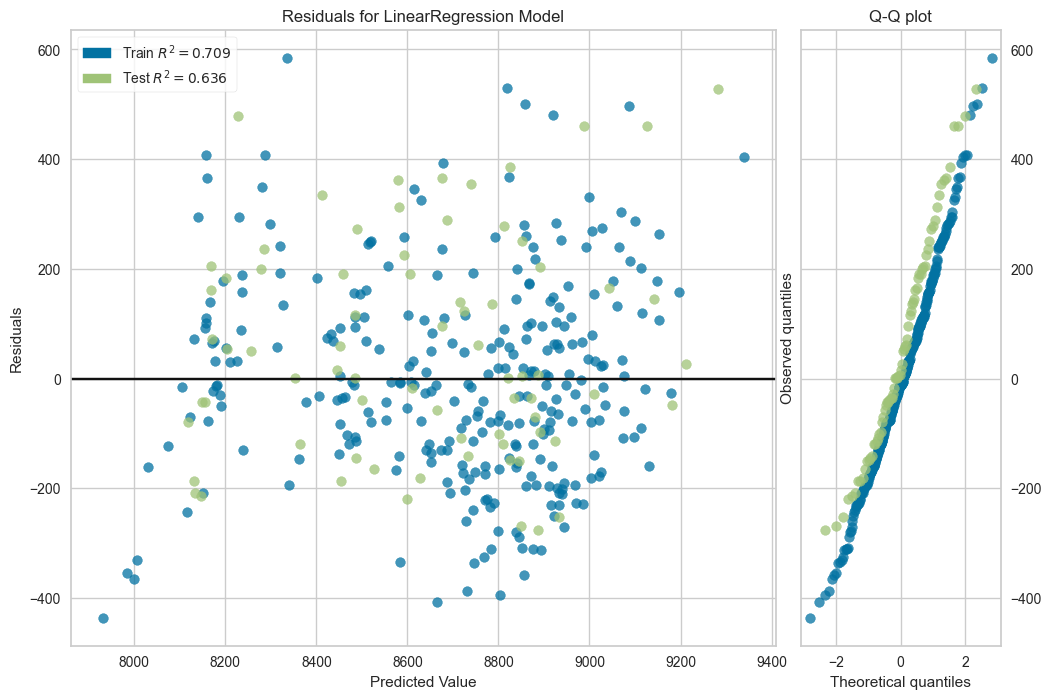

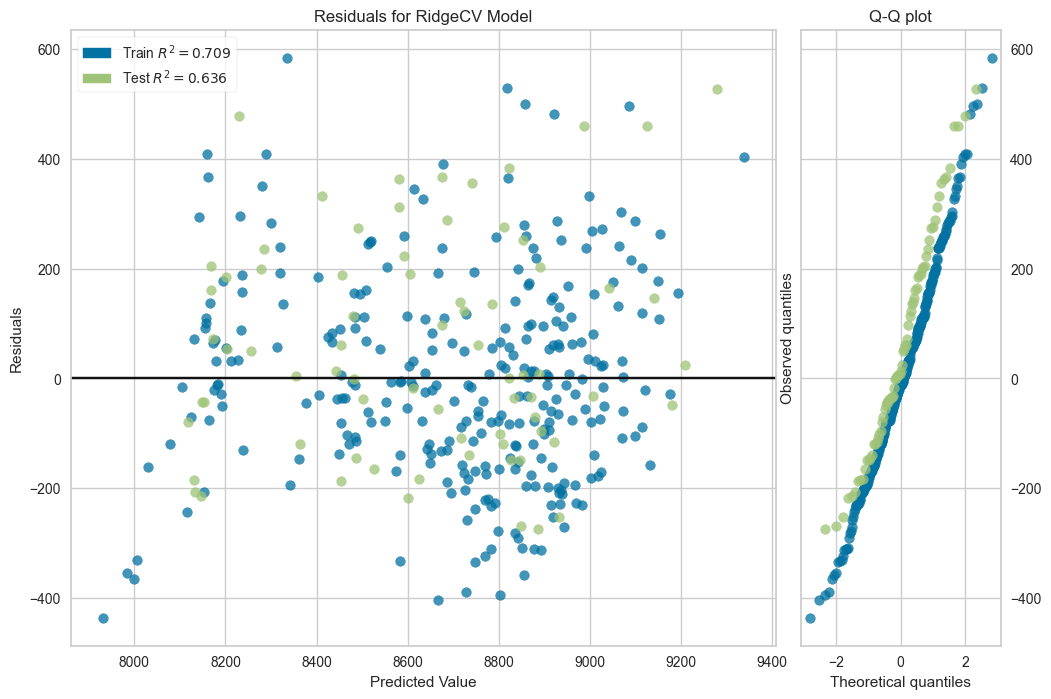

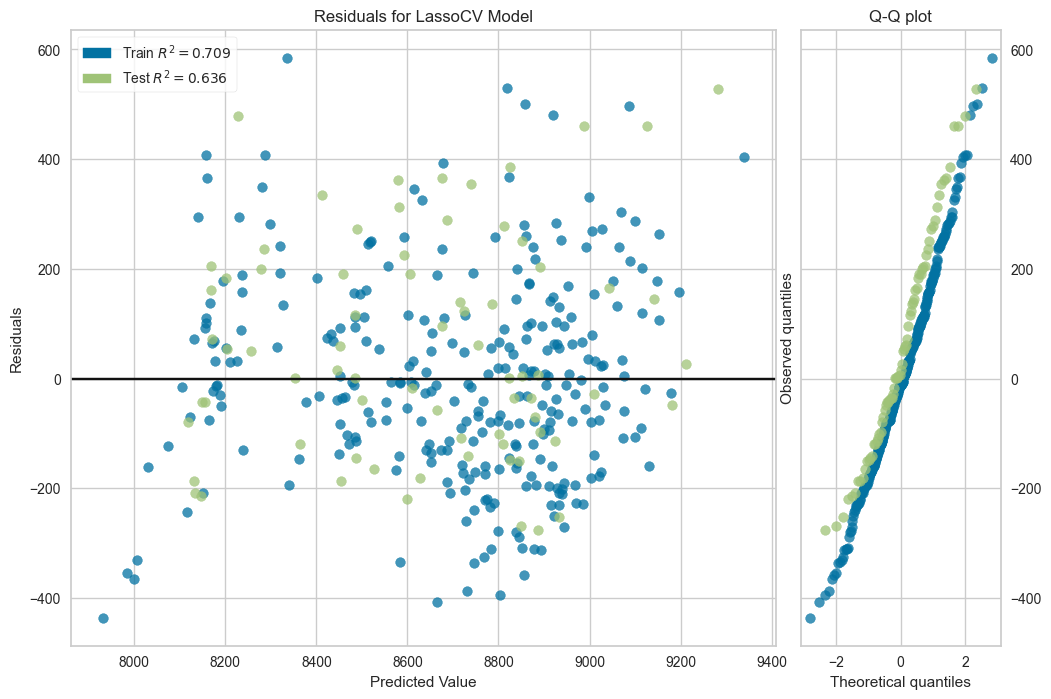

In [92]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);
plt.figure(figsize=(12,8));
viz = residuals_plot(ridge_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);
plt.figure(figsize=(12,8));
viz = residuals_plot(lasso_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

Para tratar de entender los modelos podemos visualizar los pesos que le ha asignado cada modelo a cada una de las variables de los datos.

In [93]:
weights = pd.DataFrame({'lr':lr.coef_, 'LASSO':lasso_cv.coef_, 'ridge': ridge_cv.coef_},index=X_train.columns)
weights.T

,Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges,Dades meteorològiques: Precipitació / Barcelona - Zona Universitària,Dades meteorològiques: Temperatura / Barcelona - Zona Universitària,Dades meteorològiques: Vent / Barcelona - Zona Universitària,Estat del trànsit segons trams horaris / Matí (6-13),Estat del trànsit segons trams horaris / Nit (0-5),Estat del trànsit segons trams horaris / Tarda (14-19),Estat del trànsit segons trams horaris / Vespre (20-24),IPC interanual / Barcelona,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa,Preu electricitat (majorista) /,Matriculacions de vehicles a Barcelona / Turismes
lr,0.125677,4.115237,25.363694,-16.762463,-763.864942,-518.661413,730.298616,-474.339519,249.115508,-4.289059,3.419591,-2.818470,-2.587358,-1.007081
LASSO,0.125680,4.116095,25.362067,-16.767910,-763.088168,-518.221030,729.507891,-474.127621,249.120160,-4.292088,3.420282,-2.818537,-2.587335,-1.006989
ridge,0.125909,4.136544,25.328141,-16.895030,-744.366504,-510.866789,710.780325,-470.114721,249.272365,-4.375944,3.434165,-2.818950,-2.587543,-1.004840


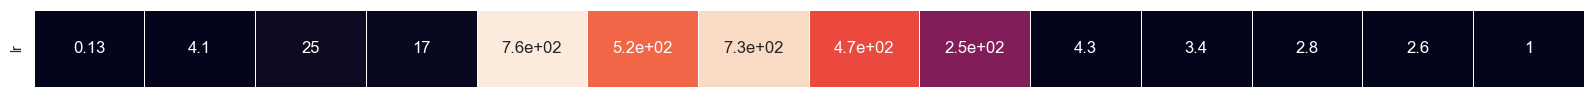

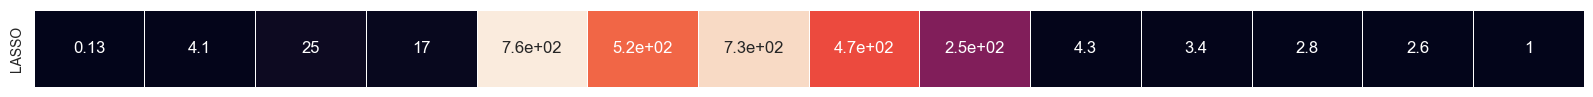

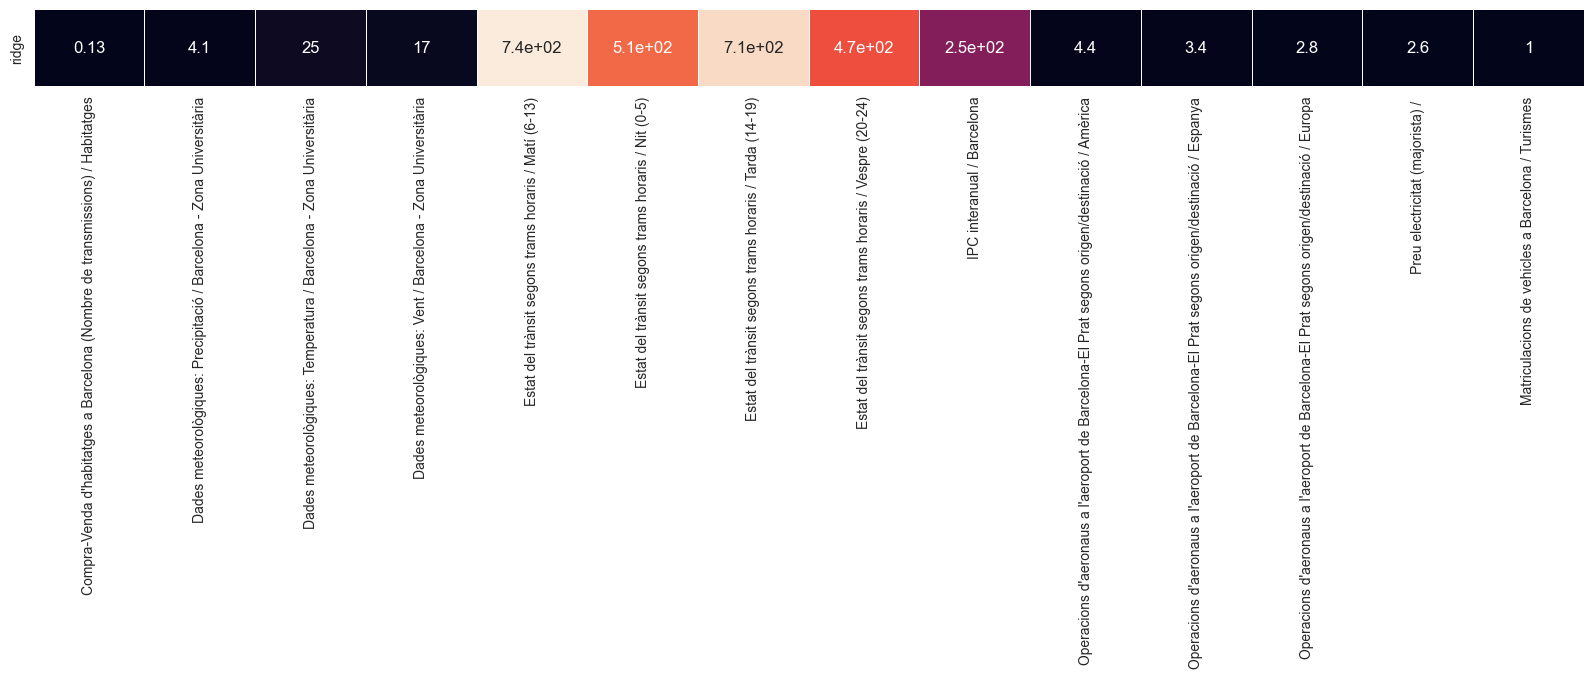

In [94]:
fig,  ax = plt.subplots( figsize = (20,1));
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['LASSO'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['ridge'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

Vemos que los tres modelos coinciden bastante en que variables son las relevantes y cuales no. Vemos claramente dos categorias, la formada por las variables con pesos > 100 y las con pesos < 50.


Las variables que los 3 modelos destacan no parece tener ninguna relación con la variables que queremos predecir, tan solo la variable que trata del IPC internaual podria tener algun sentido.
Tambien, los 3 modelos, desestiman las variables del transito en el aeropuerto del part, que, a priori, podrian parecer mas importantes que las demás.

Probaremos de eliminar las variables de menor peso, y reajustar los modelos.

In [95]:
X_train = X_train.drop(columns=["Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges",'Dades meteorològiques: Precipitació / Barcelona - Zona Universitària',
       'Matriculacions de vehicles a Barcelona / Turismes', 'Preu electricitat (majorista) / '])

X_test = X_test.drop(columns=["Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges",'Dades meteorològiques: Precipitació / Barcelona - Zona Universitària',
       'Matriculacions de vehicles a Barcelona / Turismes', 'Preu electricitat (majorista) / '])

In [96]:
lr = LinearRegression().fit(X_train,y_train);
r2_lr = np.mean(cross_val_score(lr.fit(X_train,y_train),X_train,y_train))

lasso_cv =LassoCV(alphas=lambdas,cv=5,tol=1e-1).fit(X_train,y_train)
r2_lasso =  np.mean(cross_val_score(lasso_cv, X_train,y_train))

ridge_cv = RidgeCV(alphas=lambdas, cv=5).fit(X_train, y_train)
r2_ridge = np.mean(cross_val_score(ridge_cv, X_train, y_train, cv=5, scoring='r2'))

r2_results = pd.DataFrame({'lr':r2_lr, 'Ridge':r2_ridge, 'LASSO':r2_lasso},index=['CV R2'])

r2_results.loc['Test R2', :] =[r2_score(y_test,lr.predict(X_test)),
                                r2_score(y_test,ridge_cv.predict(X_test)),
                                r2_score(y_test,lasso_cv.predict(X_test))]
r2_results.loc['lambda','lr']='N/A'
r2_results.loc['lambda','Ridge']=ridge_cv.alpha_
r2_results.loc['lambda','LASSO']=lasso_cv.alpha_
r2_results

,lr,Ridge,LASSO
CV R2,0.60988,0.607433,0.610669
Test R2,0.610725,0.610916,0.610732
lambda,N/A,0.010000,0.001000


Vemos que, no solo no han mejorados los resultados, sino que han empeorado ligeramente.

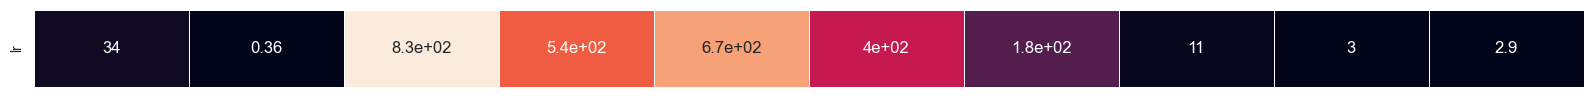

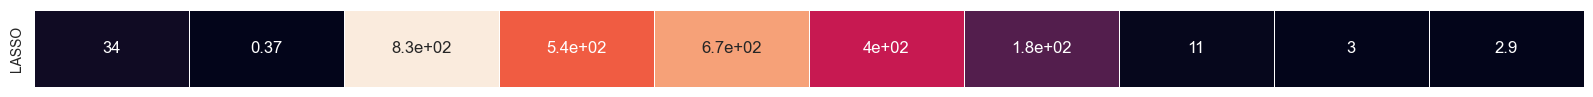

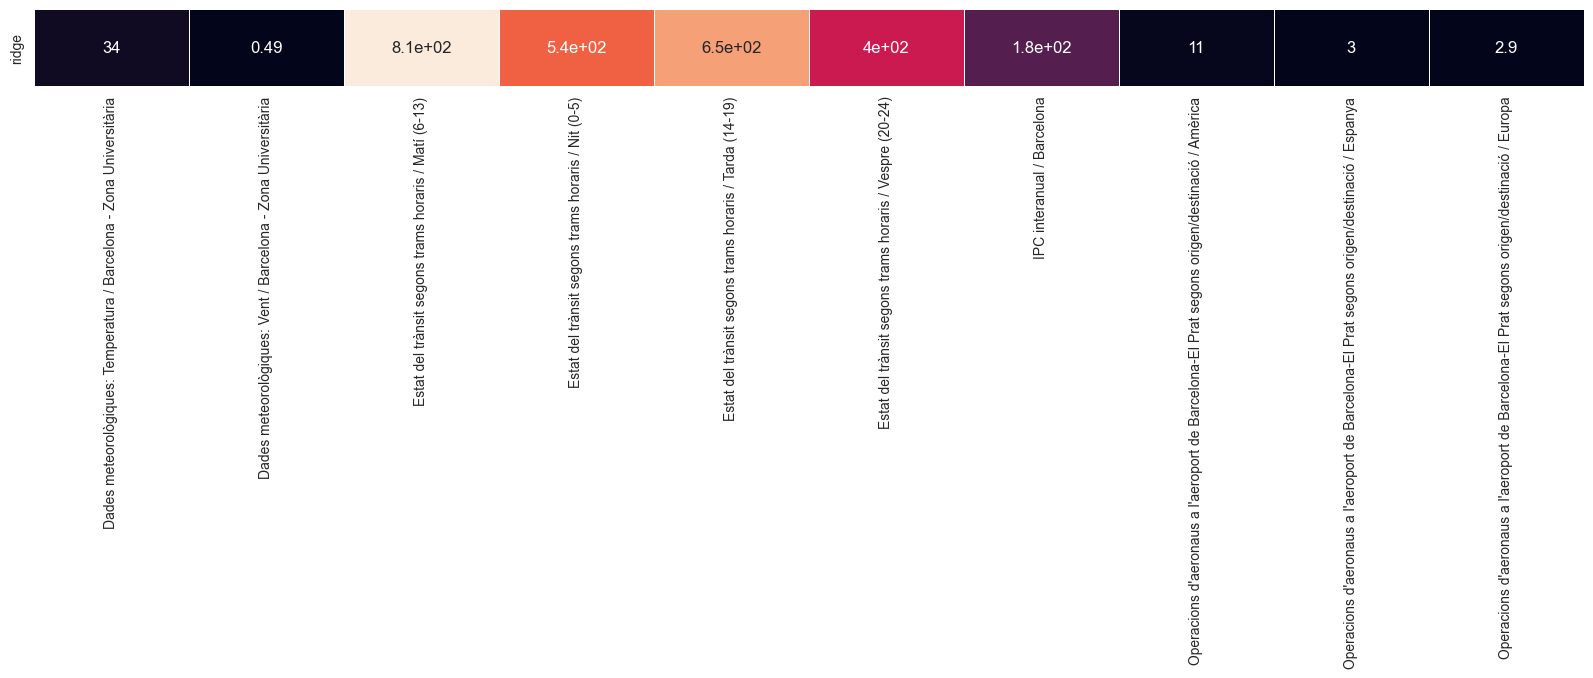

In [97]:
weights = pd.DataFrame({'lr':lr.coef_, 'LASSO':lasso_cv.coef_, 'ridge': ridge_cv.coef_},index=X_train.columns)
fig,  ax = plt.subplots( figsize = (20,1));
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['LASSO'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['ridge'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

Podemos ver que la distribucion de los pesos es bastante parecida.

Podemos probar, con la ayuda de sklearn, de ajustar nustros datos con la distribucion de un polinomio de grado dos. Usar un polinomio de grado superior podria hacer que nuestro modelo de sobreajustara a los datos de training.

In [98]:
from sklearn.preprocessing import PolynomialFeatures    
import warnings
warnings.filterwarnings('ignore')

t = PolynomialFeatures(degree=2)
d = t.fit_transform(X_train)
f = t.transform(X_test)

lasso_cv =LassoCV(alphas=lambdas,cv=5,tol=1e-1).fit(d,y_train)
r2_lasso =  np.mean(cross_val_score(lasso_cv, d,y_train))

ridge_cv = RidgeCV(alphas=lambdas, cv=5).fit(d, y_train)
r2_ridge = np.mean(cross_val_score(ridge_cv, d, y_train, cv=5, scoring='r2'))

r2_results = pd.DataFrame({'LASSO':r2_lasso, 'Ridge': r2_ridge},index=['CV R2'])
r2_results.loc['Test R2', :] =[r2_score(y_test,ridge_cv.predict(f)),
                                r2_score(y_test,lasso_cv.predict(f))]
r2_results.loc['lambda','Ridge']=ridge_cv.alpha_
r2_results.loc['lambda','LASSO']=lasso_cv.alpha_
r2_results

,LASSO,Ridge
CV R2,0.712516,0.704601
Test R2,0.701767,0.685825
lambda,1.000000,100.000000


Podemos ver tambien los pesos que cada modelo a assignado a cada una de las nuevas variables generadas.
Vemos que esta vez, los dos modelos, tienen opiniones bastante diferentes al respecto, este encaja con su pobre rendimiento.

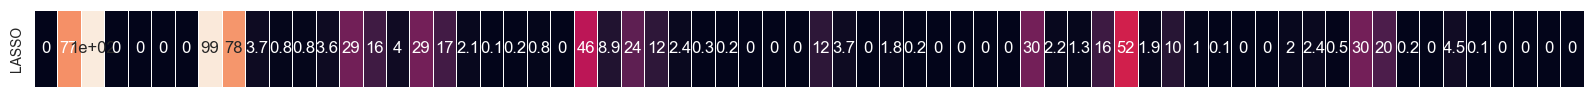

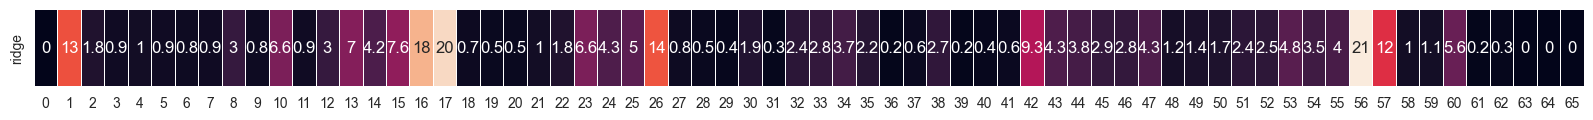

In [100]:
weights = pd.DataFrame({'LASSO':lasso_cv.coef_, 'ridge': ridge_cv.coef_},index=range(len(lasso_cv.coef_)))


plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['LASSO'],:].abs().round(1),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['ridge'],:].abs().round(1),annot=True, linewidths=.5,cbar=False,xticklabels=True);

Vemos que los resultados han mejorado bastante, pasando en ambos modelos de un 0.63 a casi un 0.70. 
De todas maneras, este sigue siendo un resultado mediocre, probablemente el conjunto de datos original no contenga mucha informacion que nos ayude a predecir nuestra variable objetivo